In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
!conda install -c anaconda seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [2]:
# STEP 1: LOAD DATA 

# Use pandas .read_csv() method to read in classified dataset
# index_col -> argument assigns the index to a particular column
df_1= pd.read_csv('/Users/upasanadhar/Documents/Lakes/ML with Python/Train data_15 nov_2.csv',index_col=0)
# Use the .head() method to display the first few rows
df_1.head()

,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,AREA,PERIMETER,VIDEO,ASPECT,...,Xferet-Y feret,Dav-Dmax,Dav-Dmin,Dmax-Dmin,Circularity (4piA/P^2),Convexity/Waviness shape factor(Pc/P),Spherical equivalent Vol (V=(1/6*pi)*Da^3),Elongation shape factor((i2/i1)^1/2),Compactness sh. Factor [(A^2)/{2*pi(i1^2+i2^2)^(1/2)}],Observed Sphere
PART#,,,,,,,,,,,,,,,,,,,,,
455,2.38284,8.339940,3.36636,7.750180,1.200360,1.750470,11.400200,20.3741,96,4.42749,...,-5.957100,-4.383820,2.166000,6.549820,0.344941,0.085916,19.964574,1.870829,6.319920e+00,0
8887,2.97847,4.616630,2.01746,5.504950,1.053020,1.243770,3.570700,12.2923,139,4.42603,...,-1.638160,-3.487490,0.964440,4.451930,0.296809,0.101183,4.297276,1.244990,3.695342e-01,0
3203,1.78708,3.425240,1.67816,3.577400,0.499500,0.808924,3.504160,10.7743,220,4.42242,...,-1.638160,-1.899240,1.178660,3.077900,0.379136,0.075079,2.473309,1.384438,5.061014e-01,0
6344,3.57417,3.425240,2.02722,4.633390,0.703449,1.048000,4.158420,11.6026,144,4.42118,...,0.148930,-2.606170,1.323771,3.929941,0.387978,0.090325,4.359945,0.978944,5.562274e-01,0
527,19.81320,27.410801,11.13580,31.875099,6.425260,7.213200,175.520004,76.1166,75,4.41900,...,-7.597601,-20.739299,4.710540,25.449839,0.380502,0.094765,722.674461,1.176206,1.635874e+06,0


In [3]:
df=df_1[['ASPECT','Xferet -Dav','Yferet-Dav','Xferet-Y feret','Dav-Dmax','Dav-Dmin','Dmax-Dmin','Circularity (4piA/P^2)','Convexity/Waviness shape factor(Pc/P)','Spherical equivalent Vol (V=(1/6*pi)*Da^3)','Elongation shape factor((i2/i1)^1/2)','Compactness sh. Factor [(A^2)/{2*pi(i1^2+i2^2)^(1/2)}]','Observed Sphere']]

In [4]:
#STEP 2: STANDARDIZE DATASET

# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class='Obs_Sphere_bin', here in this data 
# use the .drop() method to gather all features except Target Class= 'Obs_Sphere_bin', here in this data 
# axis -> argument refers to columns; a 0 would represent rows
scaler.fit(df.drop('Observed Sphere', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(df.drop('Observed Sphere',axis=1))
# Review the array of values generated from the scaled features process
scaled_features

array([[ 0.09464029, -0.80432994,  0.54492581, ..., -0.16278501,
         2.99580752, -0.06133663],
       [ 0.0942231 , -0.35154622,  0.02041957, ..., -0.18220286,
         0.74346701, -0.06134238],
       [ 0.09319159, -0.54995531, -0.16780674, ..., -0.18446346,
         1.24532801, -0.06134225],
       ...,
       [-0.33720467, -0.0893945 ,  0.03883818, ..., -0.17042377,
         0.06758591, -0.06134134],
       [-0.724279  , -0.64040591, -0.48389199, ..., -0.17528859,
         0.28656247, -0.06134124],
       [-0.7256048 , -0.69025672, -0.39959225, ..., -0.15277392,
         0.46548136, -0.06133761]])

In [6]:
#STEP 3: THE NORAMALIZED DATASET MINUS TARGET COLUMN 

# Here we have the normalized dataset, minus the target column
#use scaled features to create a datafrma eof features
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,ASPECT,Xferet -Dav,Yferet-Dav,Xferet-Y feret,Dav-Dmax,Dav-Dmin,Dmax-Dmin,Circularity (4piA/P^2),Convexity/Waviness shape factor(Pc/P),Spherical equivalent Vol (V=(1/6*pi)*Da^3),Elongation shape factor((i2/i1)^1/2),Compactness sh. Factor [(A^2)/{2*pi(i1^2+i2^2)^(1/2)}]
0,0.094640,-0.804330,0.544926,-1.214797,-0.035855,0.145467,0.067224,-0.089093,-0.473568,-0.162785,2.995808,-0.061337
1,0.094223,-0.351546,0.020420,-0.328711,0.122498,-0.441733,-0.214487,-0.316823,-0.287799,-0.182203,0.743467,-0.061342
2,0.093192,-0.549955,-0.167807,-0.328711,0.403090,-0.337044,-0.398996,0.072694,-0.605442,-0.184463,1.245328,-0.061342
3,0.092837,-0.215110,-0.244914,0.037934,0.278198,-0.266129,-0.284581,0.114527,-0.419928,-0.182125,-0.214010,-0.061342
4,0.092214,1.445215,3.041405,-1.551367,-2.925339,1.388979,2.605174,0.079157,-0.365893,0.708145,0.495920,1.519054


In [9]:
# STEP 4: Splitting normalized data into TRAIN AND TEST SETS

# Import module to split the data
from sklearn.model_selection import train_test_split
# Set the X and ys
X = df_feat
y = df['Observed Sphere']
# Use the train_test_split() method to split the data into respective sets
# test_size -> argument refers to the size of the test subset
# random_state -> argument ensures guarantee that the output of Run 
# 1 will be equal to the output of Run 2, i.e. your split will be always the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
# STEP 5: CREATE AND TRAIN MODEL

# Import module for SVM
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# STEP 6: MAKE PREDICTIONS

# Use the .predict() method to make predictions from the X_test subset
pred = LR.predict(X_test)
# Review the predictions
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [12]:
# STEP 7: EVALUATE PREDICTIONS

# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       523
           1       0.84      0.83      0.84       184

    accuracy                           0.92       707
   macro avg       0.89      0.89      0.89       707
weighted avg       0.91      0.92      0.91       707



In [13]:
# STEP 8: CONFUSION MATRIX

# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TN - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TN - True Negative 495
FP - False Positive 28
FN - False Negative 32
TP - True Positive 152
Accuracy Rate: 0.9151343705799151
Misclassification Rate: 0.08486562942008487


[[495  28]
 [ 32 152]]


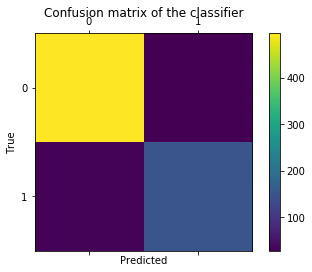

In [14]:
labels = [0,1] 

cmat = confusion_matrix(y_test, pred, labels) 

print(cmat) 

fig = plt.figure() 

ax = fig.add_subplot(111) 

cax = ax.matshow(cmat) 

plt.title('Confusion matrix of the classifier') 

fig.colorbar(cax) 

ax.set_xticklabels([''] + labels) 

ax.set_yticklabels([''] + labels) 

plt.xlabel('Predicted') 

plt.ylabel('True') 

plt.show()

In [15]:
# Different TEST data with other loaction but same trainin data used

df_data_pred = pd.read_csv('/Users/upasanadhar/Documents/Lakes/ML with Python/Test_pred_WMH_19.5cm.csv')
df_data_pred.head()

,PART#,X_FERET,Y_FERET,DAVE,DMAX,DMIN,DPERP,AREA,PERIMETER,VIDEO,...,Xferet-Y feret,Dav-Dmax,Dav-Dmin,Dmax-Dmin,Circularity (4piA/P^2),Convexity/Waviness shape factor(Pc/P),Spherical equivalent Vol (V=(1/6*pi)*Da^3),Elongation shape factor((i2/i1)^1/2),Compactness sh. Factor [(A^2)/{2*pi(i1^2+i2^2)^(1/2)}],Observed Sphere
0,1,14.29670,21.44500,16.561399,21.543699,14.320700,14.66340,223.546005,58.810902,159,...,-7.14830,-4.98230,2.240700,7.223000,0.811785,0.249331,2377.220655,1.224743,308.743205,0
1,2,5.65910,6.99941,4.686000,6.641410,3.134690,5.01185,16.722401,21.117800,137,...,-1.34031,-1.95541,1.551310,3.506720,0.470967,0.237328,53.849939,1.112134,4.947082,0
2,3,2.97847,3.87202,2.845680,3.804300,1.566210,1.93303,6.476050,12.317600,138,...,-0.89355,-0.95862,1.279470,2.238090,0.536102,0.156932,12.059702,1.140177,1.367070,0
3,4,5.36125,3.57417,3.836420,5.395180,3.285060,3.52994,10.889500,15.051800,224,...,1.78708,-1.55876,0.551360,2.110120,0.603699,0.234519,29.549957,0.816497,2.930486,0
4,5,1.34031,1.63816,1.317240,1.851380,0.832503,1.03215,1.164360,6.198330,126,...,-0.29785,-0.53414,0.484737,1.018877,0.380652,0.166521,1.196116,1.105543,0.101994,0


In [19]:
Feature_pred=df_data_pred[['ASPECT','Xferet-Dav','Yferet-Dav','Xferet-Y feret','Dav-Dmax','Dav-Dmin','Dmax-Dmin','Circularity (4piA/P^2)','Convexity/Waviness shape factor(Pc/P)','Spherical equivalent Vol (V=(1/6*pi)*Da^3)','Elongation shape factor((i2/i1)^1/2)','Compactness sh. Factor [(A^2)/{2*pi(i1^2+i2^2)^(1/2)}]']]

In [20]:
X_test_K=Feature_pred
X_test_K.head()

,ASPECT,Xferet-Dav,Yferet-Dav,Xferet-Y feret,Dav-Dmax,Dav-Dmin,Dmax-Dmin,Circularity (4piA/P^2),Convexity/Waviness shape factor(Pc/P),Spherical equivalent Vol (V=(1/6*pi)*Da^3),Elongation shape factor((i2/i1)^1/2),Compactness sh. Factor [(A^2)/{2*pi(i1^2+i2^2)^(1/2)}]
0,1.46921,-2.26470,4.88360,-7.14830,-4.98230,2.240700,7.223000,0.811785,0.249331,2377.220655,1.224743,308.743205
1,1.32514,0.97310,2.31341,-1.34031,-1.95541,1.551310,3.506720,0.470967,0.237328,53.849939,1.112134,4.947082
2,1.96805,0.13279,1.02634,-0.89355,-0.95862,1.279470,2.238090,0.536102,0.156932,12.059702,1.140177,1.367070
3,1.52841,1.52483,-0.26225,1.78708,-1.55876,0.551360,2.110120,0.603699,0.234519,29.549957,0.816497,2.930486
4,1.79371,0.02307,0.32092,-0.29785,-0.53414,0.484737,1.018877,0.380652,0.166521,1.196116,1.105543,0.101994


In [21]:
y_test_K=df_data_pred['Observed Sphere']
y_test_K[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Observed Sphere, dtype: int64

In [22]:
X_test_K=preprocessing.StandardScaler().fit(X_test_K).transform(X_test_K)
X_test_K[0:5]

array([[-0.46533042, -1.43177075,  1.27683392, -2.50643873, -0.8287812 ,
         0.48067497,  0.74589046,  1.8238259 ,  1.08795975,  0.38918994,
         1.06252148,  0.44266262],
       [-0.56020475, -0.17732403,  0.34544817, -0.48988891,  0.14063538,
         0.06038357, -0.07513067, -0.00591814,  0.89793496, -0.0295728 ,
         0.49760712, -0.03037617],
       [-0.13682967, -0.50289207, -0.12096051, -0.33477257,  0.45987551,
        -0.1053455 , -0.3554034 ,  0.34377046, -0.3748372 , -0.03710504,
         0.63828654, -0.03595058],
       [-0.42634553,  0.036437  , -0.58791989,  0.5959493 ,  0.26766971,
        -0.54924275, -0.38367519,  0.70667876,  0.85346851, -0.03395261,
        -0.98547585, -0.03351619],
       [-0.25163768, -0.54540181, -0.3765907 , -0.12794395,  0.59582298,
        -0.58986002, -0.62475871, -0.49079716, -0.22304163, -0.03906308,
         0.46454259, -0.03792042]])

In [23]:
LR_yhat=LR.predict(X_test_K)
LR_yhat

array([1, 0, 0, ..., 0, 0, 0])

In [24]:
from sklearn.metrics import jaccard_similarity_score
LR_yhat=LR.predict(X_test_K)
LR_yhat

array([1, 0, 0, ..., 0, 0, 0])

In [25]:
# STEP 7: EVALUATE PREDICTIONS

# Import classification report and confusion matrix to evaluate predictions
from sklearn.metrics import classification_report, confusion_matrix

# Print out classification report and confusion matrix
print(classification_report(y_test_K, LR_yhat))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      9793
           1       0.04      0.56      0.08       207

    accuracy                           0.74     10000
   macro avg       0.52      0.65      0.47     10000
weighted avg       0.97      0.74      0.83     10000



In [26]:
# STEP 8: CONFUSION MATRIX

# Print out confusion matrix
cmat2 = confusion_matrix(y_test_K,LR_yhat)
#print(cmat)
print('TN - True Negative {}'.format(cmat2[0,0]))
print('FP - False Positive {}'.format(cmat2[0,1]))
print('FN - False Negative {}'.format(cmat2[1,0]))
print('TP - True Positive {}'.format(cmat2[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat2[0,0],cmat2[1,1]]),np.sum(cmat2))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat2[0,1],cmat2[1,0]]),np.sum(cmat2))))

TN - True Negative 7283
FP - False Positive 2510
FN - False Negative 91
TP - True Positive 116
Accuracy Rate: 0.7399
Misclassification Rate: 0.2601


In [28]:
one=LR_yhat.sum()
one

2626